In [3]:
import py3Dmol
import requests

def fetch_protein_structure(pdb_id: str) -> str:
    """grab a PDB protein structure from the RCSB protein data bank"""
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    response = requests.get(url)
    return response.text

protein_to_pdb = {"insulin":"3I40", "collagen":"1BKV", "proteasome":"1YAR"}
protein = "proteasome" # @param ["insulin", "collagen", "proteasome"]
pdb_structure = fetch_protein_structure(pdb_id=protein_to_pdb[protein])

pdbview = py3Dmol.view(width=400, height=300)
pdbview.addModel(pdb_structure, "pdb")
pdbview.setStyle({"cartoon":{"color":"spectrum"}})
pdbview.zoomTo()
pdbview.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [4]:
from dlfb.utils.display import print_short_dict

amino_acids = [
    "R", "H", "K", "D", "E", "S", "T", "N", "Q", "G", "P", "C", "A", "V", "I", "L", "M", "F", "Y", "W",
]

amino_acid_to_index = {
    amino_acid: index for index, amino_acid in enumerate(amino_acids)
}

print_short_dict(amino_acid_to_index)

{'R': 0, 'H': 1, 'K': 2, 'D': 3, 'E': 4, 'S': 5, 'T': 6, 'N': 7, 'Q': 8, 'G': 9}
…(+10 more entries)


In [5]:
tiny_protein = ["M", "A", "L", "W", "M"]

tiny_protein_indices = [
    amino_acid_to_index[amino_acid] for amino_acid in tiny_protein
]
tiny_protein_indices

[16, 12, 15, 19, 16]

In [6]:
import jax

one_hot_encoded_sequence = jax.nn.one_hot(x = tiny_protein_indices, num_classes=len(amino_acids))
print(one_hot_encoded_sequence)

INFO:2026-01-21 16:01:06,319:jax._src.xla_bridge:810: Unable to initialize backend 'tpu': UNIMPLEMENTED: LoadPjrtPlugin is not implemented on windows yet.
2026-01-21 16:01:06.319 INFO jax._src.xla_bridge xla_bridge - backends: Unable to initialize backend 'tpu': UNIMPLEMENTED: LoadPjrtPlugin is not implemented on windows yet.


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


[Text(0.5, 146.32222222222222, 'Amino Acid Index'),
 Text(50.722222222222214, 0.5, 'Protein Sequence')]

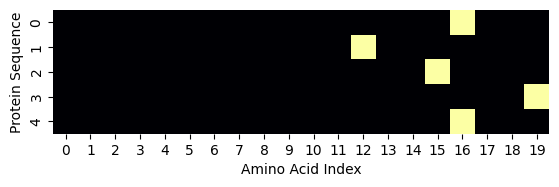

In [7]:
import seaborn as sns
fig = sns.heatmap(one_hot_encoded_sequence, square=True, cbar=False, cmap="inferno")
fig.set(xlabel="Amino Acid Index", ylabel="Protein Sequence")